<a href="https://colab.research.google.com/github/jeosol/aiml/blob/main/fashion_mnist_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jeosol/aiml.git

Cloning into 'aiml'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 5), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
#import sys
#sys.path.append('/content/gdrive/MyDrive/python')

In [68]:
import utils as nn_utils

## Several DL concepts applied to the MNIST datasetth

In [6]:
#%tensorflow_version 2.x

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as df
import matplotlib.pyplot as plt

**Load the MNIST data using keras API**

In [9]:
fashion_mnist = keras.datasets.fashion_mnist


In [10]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
# Normalize the data so we get good performance with gradient descent algorithm
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Simple **setup**

In [13]:
# Create the model and add the layers 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [16]:
# run the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), verbose=0)

In [17]:
# plot the training and validation accuracy and loss
import pandas as pd
df = pd.DataFrame(history.history)

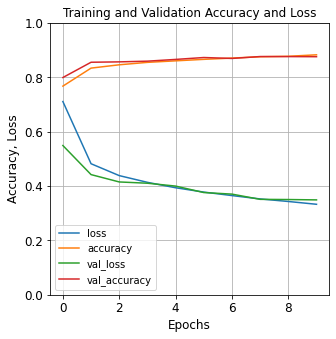

In [51]:
import matplotlib.pyplot as plt
fontsize = 12
df.plot(figsize=(5,5))
plt.title('Training and Validation Accuracy and Loss', fontsize=fontsize)
plt.ylim([0, 1.])
plt.xlabel('Epochs', fontsize=fontsize)
plt.ylabel('Accuracy, Loss', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid(True)


## Automatically generating the network architecture

In the above example, we built the network architecture by entering the relevant commands. Often times, it is important to try different network architecture, e.g., varying the number of hidden layers and the number of associated neurons. This can get cumberson. 

I wrote a simple function to automatically generate sequential NN architectures by varying the number of hidden layers and the number of neurons using function **create_nn_models**. 

The function is a bit complicated to describe in words, so we will use an example. Let us consider the following simple sequential, fully connected NNs shown in Figure 1<sup>1</sup>. 

<img src="simple_nn_networks_double.png">

Fig 1. Simple Neural Network (<small>after http://carina.cse.lehigh.edu/Data_Analytics_Course/1.%20Image%20Classification%20using%20Neural%20Network.html</small>)



Figure 1 shows two networks. The network on the left is a 2-layer neural network comprising of 4 hidden layers and an output layer with two neurons. Similarly, the network on the right is a 3-layer neural network with two hidden layer, each with 4 neurons and one output layer with a single neuron. 

Using the run_nn_models function, we can evaluate both models by passing the relevant parameters to the function as shown below:

**Left network**:

hidden_layer_infos = [[4]]

models, case_names = nn_utils.run_nn_models(X_train, y_train, X_valid, y_valid, hidden_layer_infos, output_layer_unit=2, epochs=2, verbose=1)

**Right network**:

hidden_layer_infos = [[4,4]]

models, case_names = nn_utils.run_nn_models(X_train, y_train, X_valid, y_valid, hidden_layer_infos, output_layer_unit=1, epochs=2, verbose=1)



## Apply the NN model autogeneration function

For the fashion mnist we can run two NN models each with one hidden layer containing 100 and 50 neurons respectively.

In [85]:
# Now lets run two NN models each with one hidden layer containing 100 and 50  neurons respectively. 
hidden_layer_infos = [[100], [50]]
models, case_names = nn_utils.run_nn_models(X_train, y_train, X_valid, y_valid, hidden_layer_infos, output_layer_unit=10, epochs=20, verbose=3)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
#hidden_layer(s)=hidden_layers_neurons[100] Cost=[0.7712989449501038, 0.528744101524353, 0.4795520603656769, 0.45208659768104553, 0.43317052721977234, 0.4186449348926544, 0.4067326486110687, 0.39718854427337646, 0.3876555860042572, 0.38053399324417114, 0.3725874423980713, 0.3673539161682129, 0.3611859977245331, 0.35627973079681396, 0.3503214418888092, 0.3466798663139343, 0.34110555052757263, 0.33745479583740234, 0.3323380649089813, 0.3299594521522522], Accuracy=[0.7514908909797668, 0.8209999799728394, 0.8339636325836182, 0.842163622

## Loss and Accuracy Plots

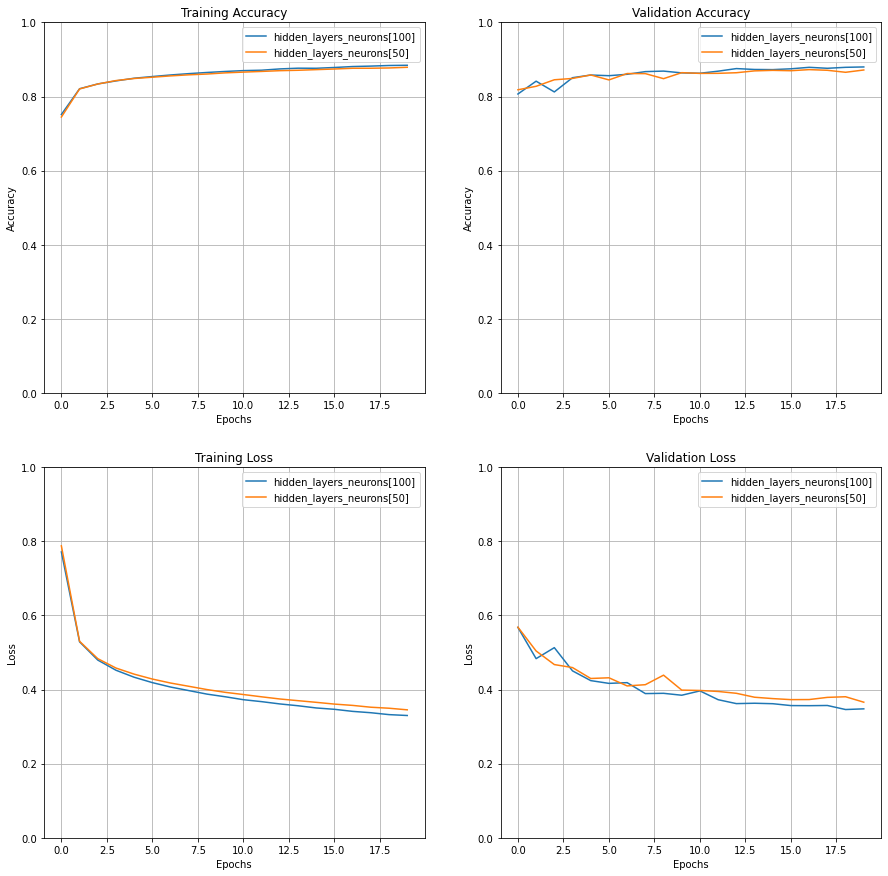

In [86]:
# Make plots of loss and accuracy for both the training and validation datasets
nn_utils.plot_info(models, case_names)